In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


## QQ plot of pairwise pvalues for trans-eqtl and null snps

In [5]:
chr7_pairwise = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Thyroid_Euro/chr7_matrixeQTL_raw.tsv.gz', sep='\t')

In [6]:
chr7_pairwise

SNP                gene          beta        t-stat  \
0          chr7_44107886  ENSG00000204160.11  3.338121e-01  5.431930e+00   
1         chr7_130368444  ENSG00000117400.16 -4.002415e-01 -5.249764e+00   
2          chr7_77355255   ENSG00000185028.3 -3.626551e-01 -5.227161e+00   
3          chr7_12351693   ENSG00000043591.5  3.071145e-01  5.150984e+00   
4          chr7_93486987  ENSG00000165060.11  3.161029e-01  5.132545e+00   
...                  ...                 ...           ...           ...   
19148959   chr7_87171035   ENSG00000160683.4 -2.232954e-08 -2.235056e-07   
19148960  chr7_120788745  ENSG00000113580.14  1.577307e-08  2.062392e-07   
19148961   chr7_50368079  ENSG00000113649.11 -1.041957e-08 -1.648992e-07   
19148962   chr7_39339726  ENSG00000136100.12 -1.036283e-08 -1.108869e-07   
19148963  chr7_142143862  ENSG00000136631.12 -7.618941e-10 -5.637325e-09   

               p-value  FDR  
0         8.875908e-08  1.0  
1         2.291572e-07  1.0  
2         2.572948e-07  1.0  
3         3.789820e-07  1.0  
4         4.159287e-07  1.0  
...                ...  ...  
19148959  9.999998e-01  1.0  
19148960  9.999998e-01  1.0  
19148961  9.999999e-01  1.0  
19148962  9.999999e-01  1.0  
19148963  1.000000e+00  1.0  

[19148964 rows x 6 columns]

In [73]:
chr7_pairwise_matrix = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_pvalue_chr7', sep='\t')


In [74]:
pvalues_hit = np.array(chr7_pairwise_matrix[chr7_pairwise_matrix['SNP']=='chr7_45109068'])[0][1:]


In [24]:
pvalues_hit

array([0.0368588600297378, 0.189285900846314, 0.0159657569617045, ...,
       0.268387104751981, 0.128495778448456, 0.29234249729885703],
      dtype=object)

Text(0.5, 1.0, 'pvalues of genes for chr7_45109068 hit, uniform dist')

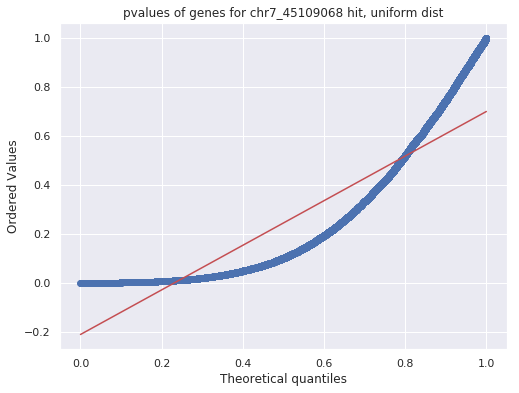

In [79]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(list(pvalues_hit), dist='uniform', plot=ax)
plt.title('pvalues of genes for chr7_45109068 hit, uniform dist')


In [43]:
stats.kstest(list(pvalues_hit), 'uniform')

KstestResult(statistic=0.41060507584630435, pvalue=0.0)

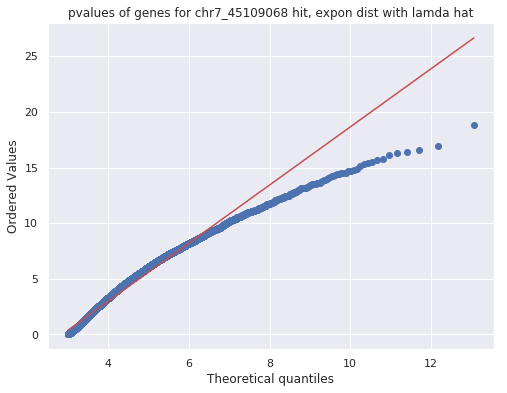

In [81]:
pvalues = -np.log(list(pvalues_hit))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of genes for chr7_45109068 hit, expon dist with lamda hat')

pass

In [45]:
stats.kstest(pvalues, 'expon')

KstestResult(statistic=0.41060507584630435, pvalue=0.0)

In [46]:
?stats.kstest

In [83]:
pvalues_null = np.array(chr7_pairwise_matrix[chr7_pairwise_matrix['SNP']=='chr7_12354340'])[0][1:]


Text(0.5, 1.0, 'pvalues of genes for a null snp, uniform dist')

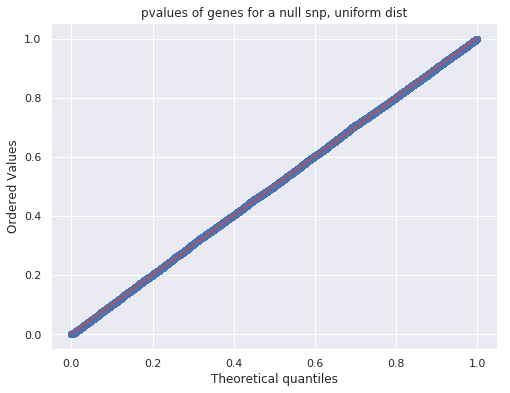

In [84]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(list(pvalues_null), dist='uniform', plot=ax)
plt.title('pvalues of genes for a null snp, uniform dist')


In [42]:
stats.kstest(list(pvalues_null), 'uniform')

KstestResult(statistic=0.007696579358806188, pvalue=0.2852393337744029)

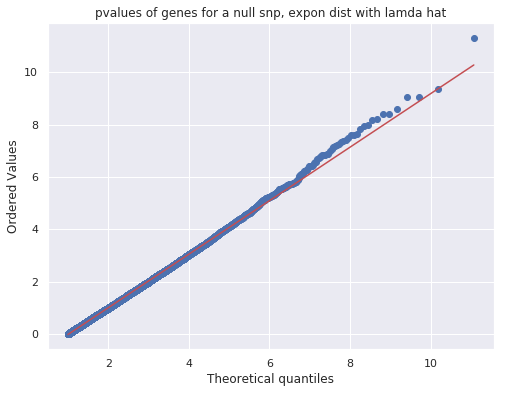

In [85]:
pvalues = -np.log(list(pvalues_null))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of genes for a null snp, expon dist with lamda hat')

pass

In [30]:
pvalues_hit_before = np.array(chr7_pairwise_matrix[chr7_pairwise_matrix['SNP']=='chr7_45082865'])[0][1:]


Text(0.5, 1.0, 'pvalues of target genes')

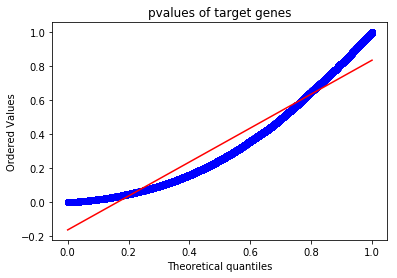

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(list(pvalues_hit_before), dist='uniform', plot=ax)
plt.title('pvalues of target genes')


## Clustering by genotype for chr7_45109068 vs expression

In [3]:
expression = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Nerve-Tibial_Euro/chr7_gene_intersect.tsv', sep='\t', index_col='id')
genotype = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Nerve-Tibial_Euro/chr7_SNP_intersect.tsv', sep='\t')

In [4]:
chr7_pairwise_matrix = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve_Tibial/chr7/gene-snp_eqtls_pvalue_chr7', sep='\t')


In [72]:
expression

GTEX-111CU    GTEX-111FC    GTEX-111VG    GTEX-111YS  \
id                                                                           
ENSG00000186092.4       0.048259      0.019160     -0.145478      0.171940   
ENSG00000187634.11     -2.645998     -1.876636     -1.041262     -1.908307   
ENSG00000188976.10     -8.864655     -3.061615     -0.023590     -5.626869   
ENSG00000187961.13      1.594158     -0.143692     -0.229895      0.406779   
ENSG00000187583.10      0.069548      0.038110      0.394435     -0.018386   
...                          ...           ...           ...           ...   
ENSG00000212907.2   12158.952148   8772.957031   7278.111328  14478.851562   
ENSG00000198886.2   26393.832031  25573.941406  20653.947266  33263.847656   
ENSG00000198786.2    3352.301270    302.685059   1221.039551   3328.313965   
ENSG00000198695.2    3526.660156    886.596069   2634.265625   4959.406738   
ENSG00000198727.2   20620.515625  17410.730469  13490.627930  21290.630859   

                      GTEX-1192X    GTEX-11DXX    GTEX-11EI6    GTEX-11EQ9  \
id                                                                           
ENSG00000186092.4      -0.049842      0.030037     -0.077296     -0.072639   
ENSG00000187634.11      0.048825     -0.644641     -2.303968     -0.078533   
ENSG00000188976.10     11.074631     -7.279373      1.178162     -3.749825   
ENSG00000187961.13     -0.617736      0.555145      0.048167      0.632092   
ENSG00000187583.10     -0.221099     -0.181189      0.460650     -0.117168   
...                          ...           ...           ...           ...   
ENSG00000212907.2    6471.020508   5266.373535   5660.943848  10338.910156   
ENSG00000198886.2   16303.865234  14543.911133  16783.900391  26983.861328   
ENSG00000198786.2    -820.107178   -477.227295   -518.676025   2265.787109   
ENSG00000198695.2    -592.541504    445.071777   -171.805420   3349.486572   
ENSG00000198727.2   12750.518555  14570.447266   9187.657227  18230.630859   

                      GTEX-11GS4    GTEX-11GSO  ...     GTEX-ZVE2  \
id                                              ...                 
ENSG00000186092.4      -0.000505     -0.013284  ...     -0.080438   
ENSG00000187634.11      0.011340      0.787927  ...     -1.600266   
ENSG00000188976.10      0.371113      1.224190  ...     -5.852894   
ENSG00000187961.13     -0.003895      0.834848  ...      2.668459   
ENSG00000187583.10      0.002865      0.203060  ...      0.010855   
...                          ...           ...  ...           ...   
ENSG00000212907.2    6264.531738   7317.895996  ...  12188.894531   
ENSG00000198886.2   16835.619141  16803.892578  ...  29683.847656   
ENSG00000198786.2    -232.878418   -476.488770  ...    698.493896   
ENSG00000198695.2     684.532471   -275.669434  ...   1286.982300   
ENSG00000198727.2   10353.613281  12320.651367  ...  16640.535156   

                       GTEX-ZVT3     GTEX-ZVZP     GTEX-ZXES     GTEX-ZXG5  \
id                                                                           
ENSG00000186092.4       0.124874     -0.056003     -0.047055     -0.123918   
ENSG00000187634.11      1.925487      0.668566      0.270199      0.803839   
ENSG00000188976.10      7.752342    -10.181099     -4.575611     -9.051497   
ENSG00000187961.13      0.362275     -1.792283      0.040382     -0.990067   
ENSG00000187583.10     -0.370534     -0.002716      0.080500      0.115328   
...                          ...           ...           ...           ...   
ENSG00000212907.2    8608.920898  10509.020508  12418.894531   4009.044922   
ENSG00000198886.2   21803.923828  32673.878906  29053.853516  18913.929688   
ENSG00000198786.2    2619.961182   1742.907715   3759.396240   -560.281250   
ENSG00000198695.2    4152.260742   3590.618896   6077.062500   1335.406128   
ENSG00000198727.2   13700.670898  23840.593750  21110.619141  15570.639648   

                       GTEX-ZYFD     GTEX-ZYFG     GTEX-ZYT6     GTEX-ZYVF  \
i

In [86]:
genotype

id  GTEX-111CU  GTEX-111FC  GTEX-111VG  GTEX-111YS  \
0        chr7_246436           0           0           1           1   
1        chr7_259884           0           0           0           0   
2        chr7_259974           0           0           0           0   
3        chr7_291120           0           0           2           1   
4        chr7_291253           0           0           0           0   
...              ...         ...         ...         ...         ...   
1117  chr7_158879928           0           1           1           1   
1118  chr7_158922528           2           1           2           2   
1119  chr7_158942122           1           0           1           1   
1120  chr7_159034635           1           0           0           2   
1121  chr7_159103826           0           1           0           0   

      GTEX-1192X  GTEX-11DXX  GTEX-11EI6  GTEX-11EQ9  GTEX-11GS4  ...  \
0              1           1           0           0           0  ...   
1              0           0           1           1           2  ...   
2              0           1           0           0           0  ...   
3              2           1           1           0           2  ...   
4              0           0           0           1           0  ...   
...          ...         ...         ...         ...         ...  ...   
1117           0           0           1           1           1  ...   
1118           2           2           1           1           1  ...   
1119           0           1           0           0           0  ...   
1120           0           0           0           0           0  ...   
1121           1           0           0           0           1  ...   

      GTEX-ZVE2  GTEX-ZVT3  GTEX-ZVZP  GTEX-ZXES  GTEX-ZXG5  GTEX-ZYFD  \
0             0          1          2          0          0          1   
1             2          1          0          2          0          0   
2             0          0          0          0          1          0   
3             1          2          0          0          1          1   
4             0          0          0          0          1          0   
...         ...        ...        ...        ...        ...        ...   
1117          2          2          0          0          0          0   
1118          1          0          2          2          2          2   
1119          1          0          0          0          0          0   
1120          0          1          0          0          1          0   
1121          1          0          2          0          0          0   

      GTEX-ZYFG  GTEX-ZYT6  GTEX-ZYVF  GTEX-ZZ64  
0             1          0          0          0  
1             1          2          1          1  
2             1          0          0          0  
3             2          2          1          1  
4             0          0          1          0  
...         ...        ...        ...        ...  
1117          1          0          1          1  
1118          2          2          1          1  
1119          0          0          0          0  
1120          0          1          0          0  
1121          1          0          0          0  

[1122 rows x 450 columns]

In [5]:
genotype_hit = genotype[genotype['id']=='chr7_45109068']
genotype_hit = genotype_hit.set_index(['id'])
genotype_hit.sort_values(by='chr7_45109068', axis=1)

GTEX-QDVJ  GTEX-WL46  GTEX-1EH9U  GTEX-WOFM  GTEX-1E1VI  \
id                                                                       
chr7_45109068          0          0           0          0           0   

               GTEX-1CB4J  GTEX-WRHU  GTEX-1CB4H  GTEX-WVLH  GTEX-1CB4F  ...  \
id                                                                       ...   
chr7_45109068           0          0           0          0           0  ...   

               GTEX-XMK1  GTEX-1MJK3  GTEX-ZT9X  GTEX-ZP4G  GTEX-1K9T9  \
id                                                                       
chr7_45109068          2           2          2          2           2   

               GTEX-1GMRU  GTEX-1QPFJ  GTEX-1F5PK  GTEX-1B97I  GTEX-T6MO  
id                                                                        
chr7_45109068           2           2           2           2          2  

[1 rows x 449 columns]

In [11]:
column_order = genotype_hit.sort_values(by='chr7_45109068', axis=1).columns

In [34]:
genotype_hit.sort_values(by='chr7_45109068', axis=1)

GTEX-QDVJ  GTEX-WL46  GTEX-1EH9U  GTEX-WOFM  GTEX-1E1VI  \
id                                                                       
chr7_45109068          0          0           0          0           0   

               GTEX-1CB4J  GTEX-WRHU  GTEX-1CB4H  GTEX-WVLH  GTEX-1CB4F  ...  \
id                                                                       ...   
chr7_45109068           0          0           0          0           0  ...   

               GTEX-XMK1  GTEX-1MJK3  GTEX-ZT9X  GTEX-ZP4G  GTEX-1K9T9  \
id                                                                       
chr7_45109068          2           2          2          2           2   

               GTEX-1GMRU  GTEX-1QPFJ  GTEX-1F5PK  GTEX-1B97I  GTEX-T6MO  
id                                                                        
chr7_45109068           2           2           2           2          2  

[1 rows x 449 columns]

In [42]:
genotype_hit['GTEX-QDVJ']['chr7_45109068']

0

In [12]:
column_cluster_rename = genotype_hit.rename(columns = lambda x: x +'_' + str(genotype_hit[x]['chr7_45109068'])).sort_values(by='chr7_45109068', axis=1)

In [14]:
expression_clustered = expression[column_order]

In [15]:
expression_clustered = expression_clustered.rename(columns = lambda x: x +'_' + str(genotype_hit[x]['chr7_45109068']))

In [16]:
expression_clustered_std = expression_clustered.copy().T
# apply the z-score method
for column in expression_clustered_std.columns:
    expression_clustered_std[column] = (expression_clustered_std[column] - expression_clustered_std[column].mean()) / expression_clustered_std[column].std()

In [93]:
expression_clustered

GTEX-QDVJ_0   GTEX-WL46_0  GTEX-1EH9U_0   GTEX-WOFM_0  \
id                                                                           
ENSG00000186092.4       0.471546     -0.032765     -0.162684     -0.052664   
ENSG00000187634.11     -3.334987      4.129838     -1.838517     -4.033845   
ENSG00000188976.10     -1.330643     -0.263477     -3.668236      2.033417   
ENSG00000187961.13     -1.011835      0.220661      0.379313      1.050967   
ENSG00000187583.10      1.298513     -0.214591     -0.208705      0.000083   
...                          ...           ...           ...           ...   
ENSG00000212907.2   11698.788086  11199.039062  16478.791016   9278.864258   
ENSG00000198886.2   30533.750000  29883.916016  31533.847656  25393.859375   
ENSG00000198786.2    1722.449219    826.923340   4457.505859   3602.243408   
ENSG00000198695.2    2324.636719   1869.905273   5332.861816   6831.433594   
ENSG00000198727.2   18220.427734  23080.574219  17210.654297  16110.696289   

                    GTEX-1E1VI_0  GTEX-1CB4J_0   GTEX-WRHU_0  GTEX-1CB4H_0  \
id                                                                           
ENSG00000186092.4      -0.066083     -0.015764     -0.026927      0.027550   
ENSG00000187634.11      3.062116      0.457174      1.421559     -2.691070   
ENSG00000188976.10     -1.008865     -0.167236      5.204994    -11.358131   
ENSG00000187961.13     -0.429187     -1.609584     -1.067303     -2.088532   
ENSG00000187583.10      0.033299     -0.010006     -0.066634      0.118889   
...                          ...           ...           ...           ...   
ENSG00000212907.2   10778.934570  10228.849609  11808.856445  22628.769531   
ENSG00000198886.2   21303.925781  21033.826172  29683.904297  43833.828125   
ENSG00000198786.2    2271.411621   2053.341309   -241.654541   4907.205078   
ENSG00000198695.2    2922.666016   2307.385742   -201.822632   4807.815918   
ENSG00000198727.2   14590.684570  15470.572266  16410.667969  23370.617188   

                     GTEX-WVLH_0  GTEX-1CB4F_0  ...   GTEX-XMK1_2  \
id                                              ...                 
ENSG00000186092.4       0.002474     -0.024224  ...     -0.023045   
ENSG00000187634.11      1.147211     -4.255807  ...     -0.765203   
ENSG00000188976.10      2.665657     -3.357666  ...      0.036842   
ENSG00000187961.13     -0.867061      2.452296  ...     -1.699605   
ENSG00000187583.10     -0.138235     -0.044007  ...     -0.070432   
...                          ...           ...  ...           ...   
ENSG00000212907.2   10389.106445  12109.036133  ...  11778.958984   
ENSG00000198886.2   23973.945312  25113.953125  ...  34363.914062   
ENSG00000198786.2     918.818359   1393.155762  ...   3427.962646   
ENSG00000198695.2    1556.215820   1122.847046  ...   5740.463867   
ENSG00000198727.2   14270.598633  19640.675781  ...  22500.640625   

                    GTEX-1MJK3_2   GTEX-ZT9X_2   GTEX-ZP4G_2  GTEX-1K9T9_2  \
id                                                                           
ENSG00000186092.4       0.005468     -0.038489      0.002112     -0.062213   
ENSG00000187634.11      3.200464      2.186642     -2.393644     -1.841619   
ENSG00000188976.10     -3.913040      6.100864      3.195007     -1.706261   
ENSG00000187961.13      0.638956      2.726155      0.436669     -3.629027   
ENSG00000187583.10     -0.169503      0.142848     -0.028148      0.140724   
...                          ...           ...           ...           ...   
ENSG00000212907.2   10988.852539  10359.082031  12048.955078  14918.912109   
ENSG00000198886.2   23463.839844  25883.916016  27323.867188  27643.896484   
ENSG00000198786.2    3751.268066   2211.636963   1969.538818   3444.460449   
ENSG00000198695.2    4427.484375   3896.752930   2328.173340   3609.228027   
ENSG00000198727.2   15810.569336  17480.593750  18540.601562  18990.675781   

                    GTEX-1GMRU_2  GTEX-1QPFJ_2  GTEX-1F5PK_2  GTEX-1B97I_2  \


In [106]:
expression_clustered_std

id            ENSG00000186092.4  ENSG00000187634.11  ENSG00000188976.10  \
GTEX-QDVJ_0            4.973908           -1.292770           -0.221713   
GTEX-WL46_0           -0.345510            1.601436           -0.043623   
GTEX-1EH9U_0          -1.715874           -0.712569           -0.611815   
GTEX-WOFM_0           -0.555400           -1.563725            0.339687   
GTEX-1E1VI_0          -0.696943            1.187467           -0.168014   
...                         ...                 ...                 ...   
GTEX-1GMRU_2          -1.912815            0.237177            1.326612   
GTEX-1QPFJ_2           0.173219            1.873097            0.232870   
GTEX-1F5PK_2          -1.158769           -0.156196            0.822884   
GTEX-1B97I_2           0.171124            0.374929            0.053939   
GTEX-T6MO_2           -0.236763            0.706156            0.164370   

id            ENSG00000187961.13  ENSG00000187583.10  ENSG00000187642.9  \
GTEX-QDVJ_0            -0.725481            6.099038          -0.457864   
GTEX-WL46_0             0.158424           -1.007880          -0.343362   
GTEX-1EH9U_0            0.272203           -0.980232          -0.573945   
GTEX-WOFM_0             0.753891            0.000425          -0.378749   
GTEX-1E1VI_0           -0.307625            0.156438           0.994960   
...                          ...                 ...                ...   
GTEX-1GMRU_2            0.135096            1.410067           0.782132   
GTEX-1QPFJ_2           -0.217146            1.466799          -0.251574   
GTEX-1F5PK_2            0.293187            0.206313          -3.679351   
GTEX-1B97I_2           -1.397008           -0.956873           0.440691   
GTEX-T6MO_2            -0.335754           -0.670805          -0.385313   

id            ENSG00000188290.10  ENSG00000187608.8  ENSG00000188157.14  \
GTEX-QDVJ_0            -0.737359          -0.189293           -0.541359   
GTEX-WL46_0            -0.911124          -0.173899           -1.904179   
GTEX-1EH9U_0           -0.325157          -0.096425            1.442235   
GTEX-WOFM_0            -0.147629          -0.054200           -1.094743   
GTEX-1E1VI_0           -1.165423           0.242532           -1.422260   
...                          ...                ...                 ...   
GTEX-1GMRU_2            0.186669          -0.068469           -0.983775   
GTEX-1QPFJ_2           -0.430322          -0.056164            0.490790   
GTEX-1F5PK_2            3.014692          -0.067728            0.113152   
GTEX-1B97I_2           -0.011424          -0.005249            1.374116   
GTEX-T6MO_2            -0.422279          -0.106321            0.048290   

id            ENSG00000237330.2  ...  ENSG00000198712.1  ENSG00000228253.1  \
GTEX-QDVJ_0           -1.985245  ...           1.490871           0.318318   
GTEX-WL46_0           -1.084679  ...           1.323635           1.174661   
GTEX-1EH9U_0          -0.826591  ...           0.996743           0.281843   
GTEX-WOFM_0           -0.890000  ...          -0.183977          -1.062271   
GTEX-1E1VI_0          -1.069593  ...          -0.264726          -0.750010   
...                         ...  ...                ...                ...   
GTEX-1GMRU_2          -1.871176  ...          -1.389670          -0.925652   
GTEX-1QPFJ_2          -0.722070  ...          -0.097478          -0.537845   
GTEX-1F5PK_2           0.360689  ...          -0.962820          -1.195758   
GTEX-1B97I_2           0.242242  ...          -0.162819          -0.657321   
GTEX-T6MO_2           -0.032152  ...           0.235226           0.964867   

id            ENSG00000198899.2  ENSG00000198938.2  ENSG00000198840.2  \
GTEX-QDVJ_0            0.577877           0.256402          -0.056375   
GTEX-WL46_0            1.575139           1.281082           1.592130   
GTEX-1EH9U_0           0.472793           0.755204          -0.570916   
GTEX-WOFM_0           -0.722841          -0.257568          -0.28285

In [19]:
expression_clustered_std.index

Index(['GTEX-QDVJ_0', 'GTEX-WL46_0', 'GTEX-1EH9U_0', 'GTEX-WOFM_0',
       'GTEX-1E1VI_0', 'GTEX-1CB4J_0', 'GTEX-WRHU_0', 'GTEX-1CB4H_0',
       'GTEX-WVLH_0', 'GTEX-1CB4F_0',
       ...
       'GTEX-XMK1_2', 'GTEX-1MJK3_2', 'GTEX-ZT9X_2', 'GTEX-ZP4G_2',
       'GTEX-1K9T9_2', 'GTEX-1GMRU_2', 'GTEX-1QPFJ_2', 'GTEX-1F5PK_2',
       'GTEX-1B97I_2', 'GTEX-T6MO_2'],
      dtype='object', length=449)

In [21]:
color_dict = {}
for sample in expression_clustered_std.index:
    print(sample[-1])
    break
    genotype = sample[-1]
    if genotype == 0:
        color_dict[col] = 'r'
    if sample[-1] == 0:
    else:
        color_dict[col] = palette[1]

0


In [7]:
pvalues_hit = chr7_pairwise_matrix[chr7_pairwise_matrix['SNP']=='chr7_45109068']
pvalues_hit = pvalues_hit.set_index(['SNP'])

In [15]:
pvalues_hit.sort_values(by='chr7_45109068', axis=1)

ENSG00000198938.2  ENSG00000179163.11  ENSG00000170248.13  \
SNP                                                                        
chr7_45109068       6.803445e-09        4.575546e-08        6.363186e-08   

               ENSG00000185722.16  ENSG00000165322.17  ENSG00000166233.14  \
SNP                                                                         
chr7_45109068        7.365275e-08        8.596322e-08        9.518670e-08   

               ENSG00000166887.15  ENSG00000138592.13  ENSG00000139719.9  \
SNP                                                                        
chr7_45109068        1.420462e-07        1.535922e-07       1.863865e-07   

               ENSG00000134086.7  ...  ENSG00000164188.8  ENSG00000159374.17  \
SNP                               ...                                          
chr7_45109068       1.982057e-07  ...           0.998105            0.998343   

               ENSG00000161652.12  ENSG00000179292.4  ENSG00000138271.5  \
SNP                                                                       
chr7_45109068             0.99837           0.998434           0.998613   

               ENSG00000163288.13  ENSG00000157884.10  ENSG00000171931.12  \
SNP                                                                         
chr7_45109068            0.999064            0.999583            0.999692   

               ENSG00000164484.11  ENSG00000010219.13  
SNP                                                    
chr7_45109068              0.9997            0.999798  

[1 rows x 16414 columns]

In [8]:
tophits = pvalues_hit.sort_values(by='chr7_45109068', axis=1).columns[:1000]
nullhits = pvalues_hit.sort_values(by='chr7_45109068', ascending=False, axis=1).columns[:1000]

In [11]:
pvalues_hit

SNP  ENSG00000000003.14  ENSG00000000005.5  ENSG00000000419.12  \
815  chr7_45109068            0.036859           0.189286            0.015966   

     ENSG00000000457.13  ENSG00000000460.16  ENSG00000000938.12  \
815            0.019929            0.010115            0.704596   

     ENSG00000000971.15  ENSG00000001036.13  ENSG00000001084.10  ...  \
815            0.603665            0.012695            0.675352  ...   

     ENSG00000283654.1  ENSG00000283755.1  ENSG00000283787.1  \
815           0.738351           0.575491           0.207958   

     ENSG00000283886.1  ENSG00000283992.1  ENSG00000284024.1  \
815           0.045071            0.17617           0.006641   

     ENSG00000284308.1  ENSG00000284395.1  ENSG00000284484.1  \
815           0.029921           0.268387           0.128496   

     ENSG00000284526.1  
815           0.292342  

[1 rows x 16415 columns]

In [29]:
nullhits

Index(['ENSG00000010219.13', 'ENSG00000164484.11', 'ENSG00000171931.12',
       'ENSG00000157884.10', 'ENSG00000163288.13', 'ENSG00000138271.5',
       'ENSG00000179292.4', 'ENSG00000161652.12', 'ENSG00000159374.17',
       'ENSG00000164188.8',
       ...
       'ENSG00000131746.12', 'ENSG00000134533.6', 'ENSG00000167552.13',
       'ENSG00000185972.5', 'ENSG00000146038.11', 'ENSG00000102181.20',
       'ENSG00000256061.7', 'ENSG00000149418.10', 'ENSG00000135951.14',
       'ENSG00000189060.5'],
      dtype='object', length=1000)

In [17]:
expression_clustered_tophits = expression_clustered_std.T.reindex(tophits)
expression_clustered_nullhits = expression_clustered_std.T.reindex(nullhits)

In [109]:
expression_clustered_tophits[1:15]

GTEX-QDVJ_0  GTEX-WL46_0  GTEX-1EH9U_0  GTEX-WOFM_0  \
ENSG00000179163.11    -0.581246     0.105762     -0.486151     1.063347   
ENSG00000170248.13    -0.700711    -1.329869     -0.054097    -0.479840   
ENSG00000185722.16    -1.549917    -2.026515      0.059079     1.353668   
ENSG00000165322.17     0.967154    -0.864610      0.848002     0.550906   
ENSG00000166233.14    -0.685445    -0.440192     -0.991456     0.803929   
ENSG00000166887.15    -3.076118    -0.630182     -1.279645     0.099576   
ENSG00000138592.13    -0.826873     0.075150     -0.069004     0.629769   
ENSG00000139719.9     -1.340871    -0.202300     -0.363035     1.097175   
ENSG00000134086.7     -1.635457    -1.149839     -0.743741     1.406110   
ENSG00000143569.18     1.126251    -1.298048     -1.862068     0.084673   
ENSG00000102921.7     -1.085738    -2.277678     -1.072178    -0.475629   
ENSG00000196670.13    -0.991011    -1.185040     -0.048930    -0.704865   
ENSG00000131503.20    -0.419183    -1.655930     -0.656553    -0.045534   
ENSG00000138802.11    -0.038836    -1.742795     -0.861551     1.968922   

                    GTEX-1E1VI_0  GTEX-1CB4J_0  GTEX-WRHU_0  GTEX-1CB4H_0  \
ENSG00000179163.11      0.137314      0.343777    -0.305732     -1.919367   
ENSG00000170248.13      0.359015      1.048249     0.872577     -1.526797   
ENSG00000185722.16      0.157774     -0.730530     1.174356     -0.648533   
ENSG00000165322.17      1.003971     -0.354920     0.192916     -1.999549   
ENSG00000166233.14     -0.619740     -1.585277    -0.060467     -3.149996   
ENSG00000166887.15      0.493388      0.017164     1.538971     -1.934865   
ENSG00000138592.13      0.236139     -0.255857     0.519297     -1.260471   
ENSG00000139719.9       0.239893     -1.586153     1.041454     -0.965267   
ENSG00000134086.7      -0.992908     -0.155651     0.061108     -2.158996   
ENSG00000143569.18     -0.809160     -0.640098     1.445648     -2.786351   
ENSG00000102921.7       0.186054     -0.152200     0.469890     -2.122197   
ENSG00000196670.13     -1.324103     -0.421454     1.321152     -1.018673   
ENSG00000131503.20     -0.500685      0.035672     0.509987     -2.103641   
ENSG00000138802.11     -1.666367     -1.164666     1.165517     -2.319302   

                    GTEX-WVLH_0  GTEX-1CB4F_0  ...  GTEX-XMK1_2  GTEX-1MJK3_2  \
ENSG00000179163.11     0.095056     -0.975280  ...     0.712643      1.294009   
ENSG00000170248.13     0.016393     -0.696308  ...     0.324910      0.834057   
ENSG00000185722.16     0.260193      0.446797  ...    -0.941302      0.527665   
ENSG00000165322.17    -0.369418     -0.480661  ...    -0.083778      1.275836   
ENSG00000166233.14     1.012049     -0.841113  ...    -0.527758      0.869329   
ENSG00000166887.15     0.756589     -0.456395  ...    -0.962697      2.850754   
ENSG00000138592.13     0.610690     -0.413246  ...    -0.511826      1.207916   
ENSG00000139719.9     -0.187229     -1.333900  ...    -0.345399      1.948398   
ENSG00000134086.7      0.115666     -0.289078  ...    -0.105065      0.887105   
ENSG00000143569.18     0.586179      0.554822  ...    -1.140391      0.835202   
ENSG00000102921.7     -0.198322     -0.786511  ...    -0.361687      1.608043   
ENSG00000196670.13     0.237730     -0.585989  ...     0.279822      1.089241   
ENSG00000131503.20     1.685604      0.030991  ...     0.403152      0.783359   
ENSG00000138802.11    -0.065835     -0.518314  ...    -0.294942      0.163387   

                    GTEX-ZT9X_2  GTEX-ZP4G_2  GTEX-1K9T9_2  GTEX-1GMRU_2  \
ENSG00000179163.11     0.342875    -0.119268      0.090003      0.135746   
ENSG00000170248.13     1.018354     0.342334     -1.030427      0.604059   
ENSG00000185722.16     0.957122     0.387401     -0.607972      0.202648   
ENSG00000165322.17    -0.469175     1.015518      1.329796      0.270921   
ENSG00000166233.14     0.619825     0.287128     -1.463149      1.541008   
ENSG00000166887.15     0.316357     1.594150     -1.808004      0.

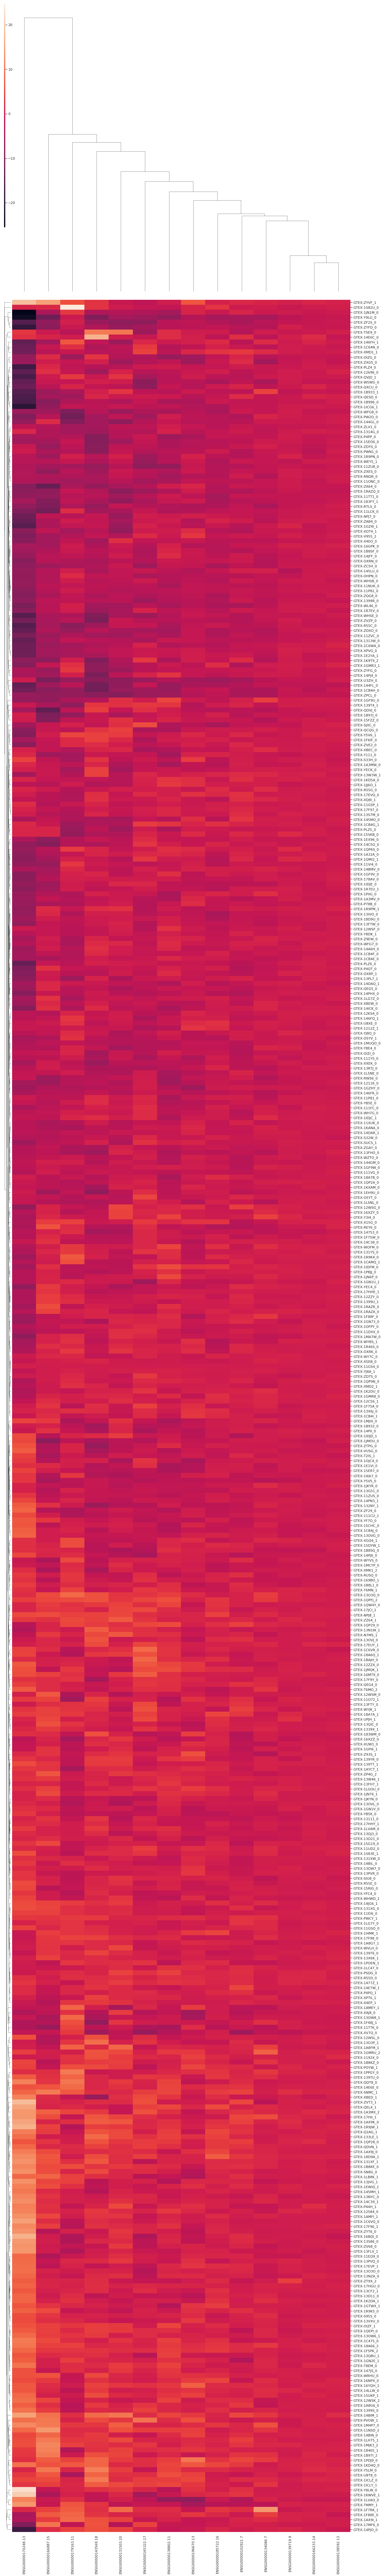

In [71]:
# sns.set(rc={'figure.figsize':(20,500)})
# plt.subplots(figsize=(20,15))
sns.clustermap(expression_clustered_tophits[1:15].T, xticklabels=True, yticklabels=True, figsize=(20,150))
plt.savefig('/storage/cynthiawu/trans_eQTL/Scripts/Plots/chr7_45109068_clustermap_genotypelabel.pdf') 

In [8]:
expression_clustered

GTEX-QDVJ     GTEX-WL46    GTEX-1EH9U     GTEX-WOFM  \
id                                                                           
ENSG00000186092.4       0.471546     -0.032765     -0.162684     -0.052664   
ENSG00000187634.11     -3.334987      4.129838     -1.838517     -4.033845   
ENSG00000188976.10     -1.330643     -0.263477     -3.668236      2.033417   
ENSG00000187961.13     -1.011835      0.220661      0.379313      1.050967   
ENSG00000187583.10      1.298513     -0.214591     -0.208705      0.000083   
...                          ...           ...           ...           ...   
ENSG00000212907.2   11698.788086  11199.039062  16478.791016   9278.864258   
ENSG00000198886.2   30533.750000  29883.916016  31533.847656  25393.859375   
ENSG00000198786.2    1722.449219    826.923340   4457.505859   3602.243408   
ENSG00000198695.2    2324.636719   1869.905273   5332.861816   6831.433594   
ENSG00000198727.2   18220.427734  23080.574219  17210.654297  16110.696289   

                      GTEX-1E1VI    GTEX-1CB4J     GTEX-WRHU    GTEX-1CB4H  \
id                                                                           
ENSG00000186092.4      -0.066083     -0.015764     -0.026927      0.027550   
ENSG00000187634.11      3.062116      0.457174      1.421559     -2.691070   
ENSG00000188976.10     -1.008865     -0.167236      5.204994    -11.358131   
ENSG00000187961.13     -0.429187     -1.609584     -1.067303     -2.088532   
ENSG00000187583.10      0.033299     -0.010006     -0.066634      0.118889   
...                          ...           ...           ...           ...   
ENSG00000212907.2   10778.934570  10228.849609  11808.856445  22628.769531   
ENSG00000198886.2   21303.925781  21033.826172  29683.904297  43833.828125   
ENSG00000198786.2    2271.411621   2053.341309   -241.654541   4907.205078   
ENSG00000198695.2    2922.666016   2307.385742   -201.822632   4807.815918   
ENSG00000198727.2   14590.684570  15470.572266  16410.667969  23370.617188   

                       GTEX-WVLH    GTEX-1CB4F  ...     GTEX-XMK1  \
id                                              ...                 
ENSG00000186092.4       0.002474     -0.024224  ...     -0.023045   
ENSG00000187634.11      1.147211     -4.255807  ...     -0.765203   
ENSG00000188976.10      2.665657     -3.357666  ...      0.036842   
ENSG00000187961.13     -0.867061      2.452296  ...     -1.699605   
ENSG00000187583.10     -0.138235     -0.044007  ...     -0.070432   
...                          ...           ...  ...           ...   
ENSG00000212907.2   10389.106445  12109.036133  ...  11778.958984   
ENSG00000198886.2   23973.945312  25113.953125  ...  34363.914062   
ENSG00000198786.2     918.818359   1393.155762  ...   3427.962646   
ENSG00000198695.2    1556.215820   1122.847046  ...   5740.463867   
ENSG00000198727.2   14270.598633  19640.675781  ...  22500.640625   

                      GTEX-1MJK3     GTEX-ZT9X     GTEX-ZP4G    GTEX-1K9T9  \
id                                                                           
ENSG00000186092.4       0.005468     -0.038489      0.002112     -0.062213   
ENSG00000187634.11      3.200464      2.186642     -2.393644     -1.841619   
ENSG00000188976.10     -3.913040      6.100864      3.195007     -1.706261   
ENSG00000187961.13      0.638956      2.726155      0.436669     -3.629027   
ENSG00000187583.10     -0.169503      0.142848     -0.028148      0.140724   
...                          ...           ...           ...           ...   
ENSG00000212907.2   10988.852539  10359.082031  12048.955078  14918.912109   
ENSG00000198886.2   23463.839844  25883.916016  27323.867188  27643.896484   
ENSG00000198786.2    3751.268066   2211.636963   1969.538818   3444.460449   
ENSG00000198695.2    4427.484375   3896.752930   2328.173340   3609.228027   
ENSG00000198727.2   15810.569336  17480.593750  18540.601562  18990.675781   

                      GTEX-1GMRU    GTEX-1QPFJ    GTEX-1F5PK    GTEX-1B97I  \
id

In [25]:
expression_clustered_tophits[:1]

GTEX-QDVJ     GTEX-WL46    GTEX-1EH9U     GTEX-WOFM  \
ENSG00000198938.2  24827.316406  30867.408203  27767.560547  21797.658203   

                     GTEX-1E1VI    GTEX-1CB4J     GTEX-WRHU   GTEX-1CB4H  \
ENSG00000198938.2  20387.542969  27547.464844  21087.537109  39007.53125   

                      GTEX-WVLH    GTEX-1CB4F  ...     GTEX-XMK1  \
ENSG00000198938.2  21317.421875  23387.529297  ...  25837.509766   

                     GTEX-1MJK3     GTEX-ZT9X     GTEX-ZP4G    GTEX-1K9T9  \
ENSG00000198938.2  13067.496094  15087.448242  21337.511719  21287.552734   

                     GTEX-1GMRU    GTEX-1QPFJ    GTEX-1F5PK    GTEX-1B97I  \
ENSG00000198938.2  14707.546875  21497.457031  18047.494141  22387.626953   

                      GTEX-T6MO  
ENSG00000198938.2  20507.591797  

[1 rows x 449 columns]

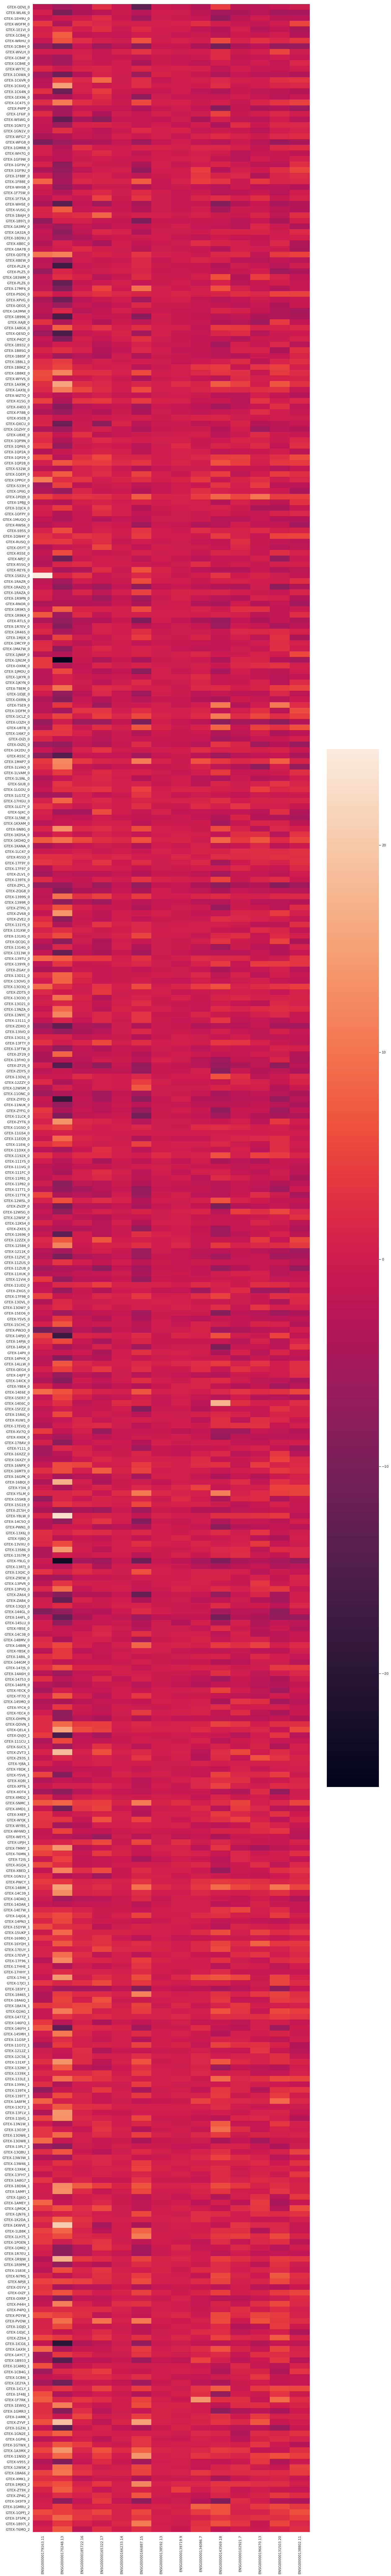

In [72]:
# sns.set(rc={'figure.figsize':(20,10)})
plt.subplots(figsize=(20,150))
sns.heatmap(expression_clustered_tophits[1:15].T, xticklabels=True, yticklabels=True)
# .set_title('Power for Mixture Model with gamma')
# plt.xlabel('# Target Genes')
# plt.ylabel('Beta effect size')
plt.savefig('/storage/cynthiawu/trans_eQTL/Scripts/Plots/chr7_45109068_heatmap_genotypelabel.pdf') 

In [104]:
expression_clustered_tophits

GTEX-QDVJ_0  GTEX-WL46_0  GTEX-1EH9U_0  GTEX-WOFM_0  \
ENSG00000198938.2     43.446856    51.518532     48.556588    46.499280   
ENSG00000179163.11    -0.026965    -0.022040     -0.025310    -0.025336   
ENSG00000170248.13    -0.032265    -0.038843     -0.022961    -0.040901   
ENSG00000185722.16    -0.028861    -0.029566     -0.022064    -0.027556   
ENSG00000165322.17    -0.018506    -0.026785     -0.018046    -0.030091   
...                         ...          ...           ...          ...   
ENSG00000130348.11    -0.024432    -0.022191     -0.021888    -0.029469   
ENSG00000174915.11    -0.029577    -0.022981     -0.028441    -0.035014   
ENSG00000122008.15    -0.025106    -0.021722     -0.023104    -0.029788   
ENSG00000225697.12    -0.025796    -0.029358     -0.021046    -0.024949   
ENSG00000074935.13    -0.031441    -0.022456     -0.034533    -0.030837   

                    GTEX-1E1VI_0  GTEX-1CB4J_0  GTEX-WRHU_0  GTEX-1CB4H_0  \
ENSG00000198938.2      47.826451     57.884939    47.206902     50.444414   
ENSG00000179163.11     -0.025810     -0.028591    -0.032055     -0.027738   
ENSG00000170248.13     -0.020820     -0.015117    -0.015370     -0.033257   
ENSG00000185722.16     -0.026208     -0.034302    -0.024251     -0.020581   
ENSG00000165322.17     -0.020246     -0.033298    -0.028378     -0.026243   
...                          ...           ...          ...           ...   
ENSG00000130348.11     -0.024889     -0.033185    -0.027529     -0.018732   
ENSG00000174915.11     -0.028079     -0.029728    -0.032172     -0.025718   
ENSG00000122008.15     -0.024920     -0.028568    -0.028058     -0.020773   
ENSG00000225697.12     -0.026083     -0.032138    -0.034827     -0.022701   
ENSG00000074935.13     -0.030599     -0.036015    -0.029082     -0.017740   

                    GTEX-WVLH_0  GTEX-1CB4F_0  ...  GTEX-XMK1_2  GTEX-1MJK3_2  \
ENSG00000198938.2     48.799330     46.214519  ...    42.274206     30.029519   
ENSG00000179163.11    -0.031630     -0.032134  ...    -0.018925     -0.027308   
ENSG00000170248.13    -0.032132     -0.035274  ...    -0.019215     -0.023959   
ENSG00000185722.16    -0.031195     -0.023450  ...    -0.026232     -0.035468   
ENSG00000165322.17    -0.034819     -0.027957  ...    -0.023482     -0.029575   
...                         ...           ...  ...          ...           ...   
ENSG00000130348.11    -0.027823     -0.028611  ...    -0.024195     -0.040518   
ENSG00000174915.11    -0.032854     -0.027396  ...    -0.030907     -0.030958   
ENSG00000122008.15    -0.030209     -0.025158  ...    -0.024236     -0.034446   
ENSG00000225697.12    -0.031869     -0.021694  ...    -0.029105     -0.034057   
ENSG00000074935.13    -0.030187     -0.027507  ...    -0.020601     -0.015019   

                    GTEX-ZT9X_2  GTEX-ZP4G_2  GTEX-1K9T9_2  GTEX-1GMRU_2  \
ENSG00000198938.2     33.088949    40.732782     41.346482     43.066333   
ENSG00000179163.11    -0.025978    -0.027473     -0.021760     -0.030575   
ENSG00000170248.13    -0.012381    -0.021894     -0.036968     -0.019099   
ENSG00000185722.16    -0.024386    -0.025153     -0.024793     -0.030788   
ENSG00000165322.17    -0.031600    -0.021132     -0.015021     -0.029734   
...                         ...          ...           ...           ...   
ENSG00000130348.11    -0.026997    -0.028599     -0.020994     -0.028840   
ENSG00000174915.11    -0.031653    -0.025319     -0.036769     -0.024976   
ENSG00000122008.15    -0.027564    -0.025238     -0.025669     -0.029805   
ENSG00000225697.12    -0.019187    -0.027565     -0.032165     -0.025542   
ENSG00000074935.13    -0.027547    -0.026021     -0.039156     -0.023453   

                    GTEX-1QPFJ_2  GTEX-1F5PK_2  GTEX-1B97I_2  GTEX-T6MO_2  
ENSG00000198938.2      47.489321     47.084017     48.431421    37.547606  
ENSG00000179163.11     -0.024187     -0.029588     -0.031867    -0.025149  
ENSG00000170248.13     -0.027189     -0.016204     -0.023262    -0.013967  
ENSG

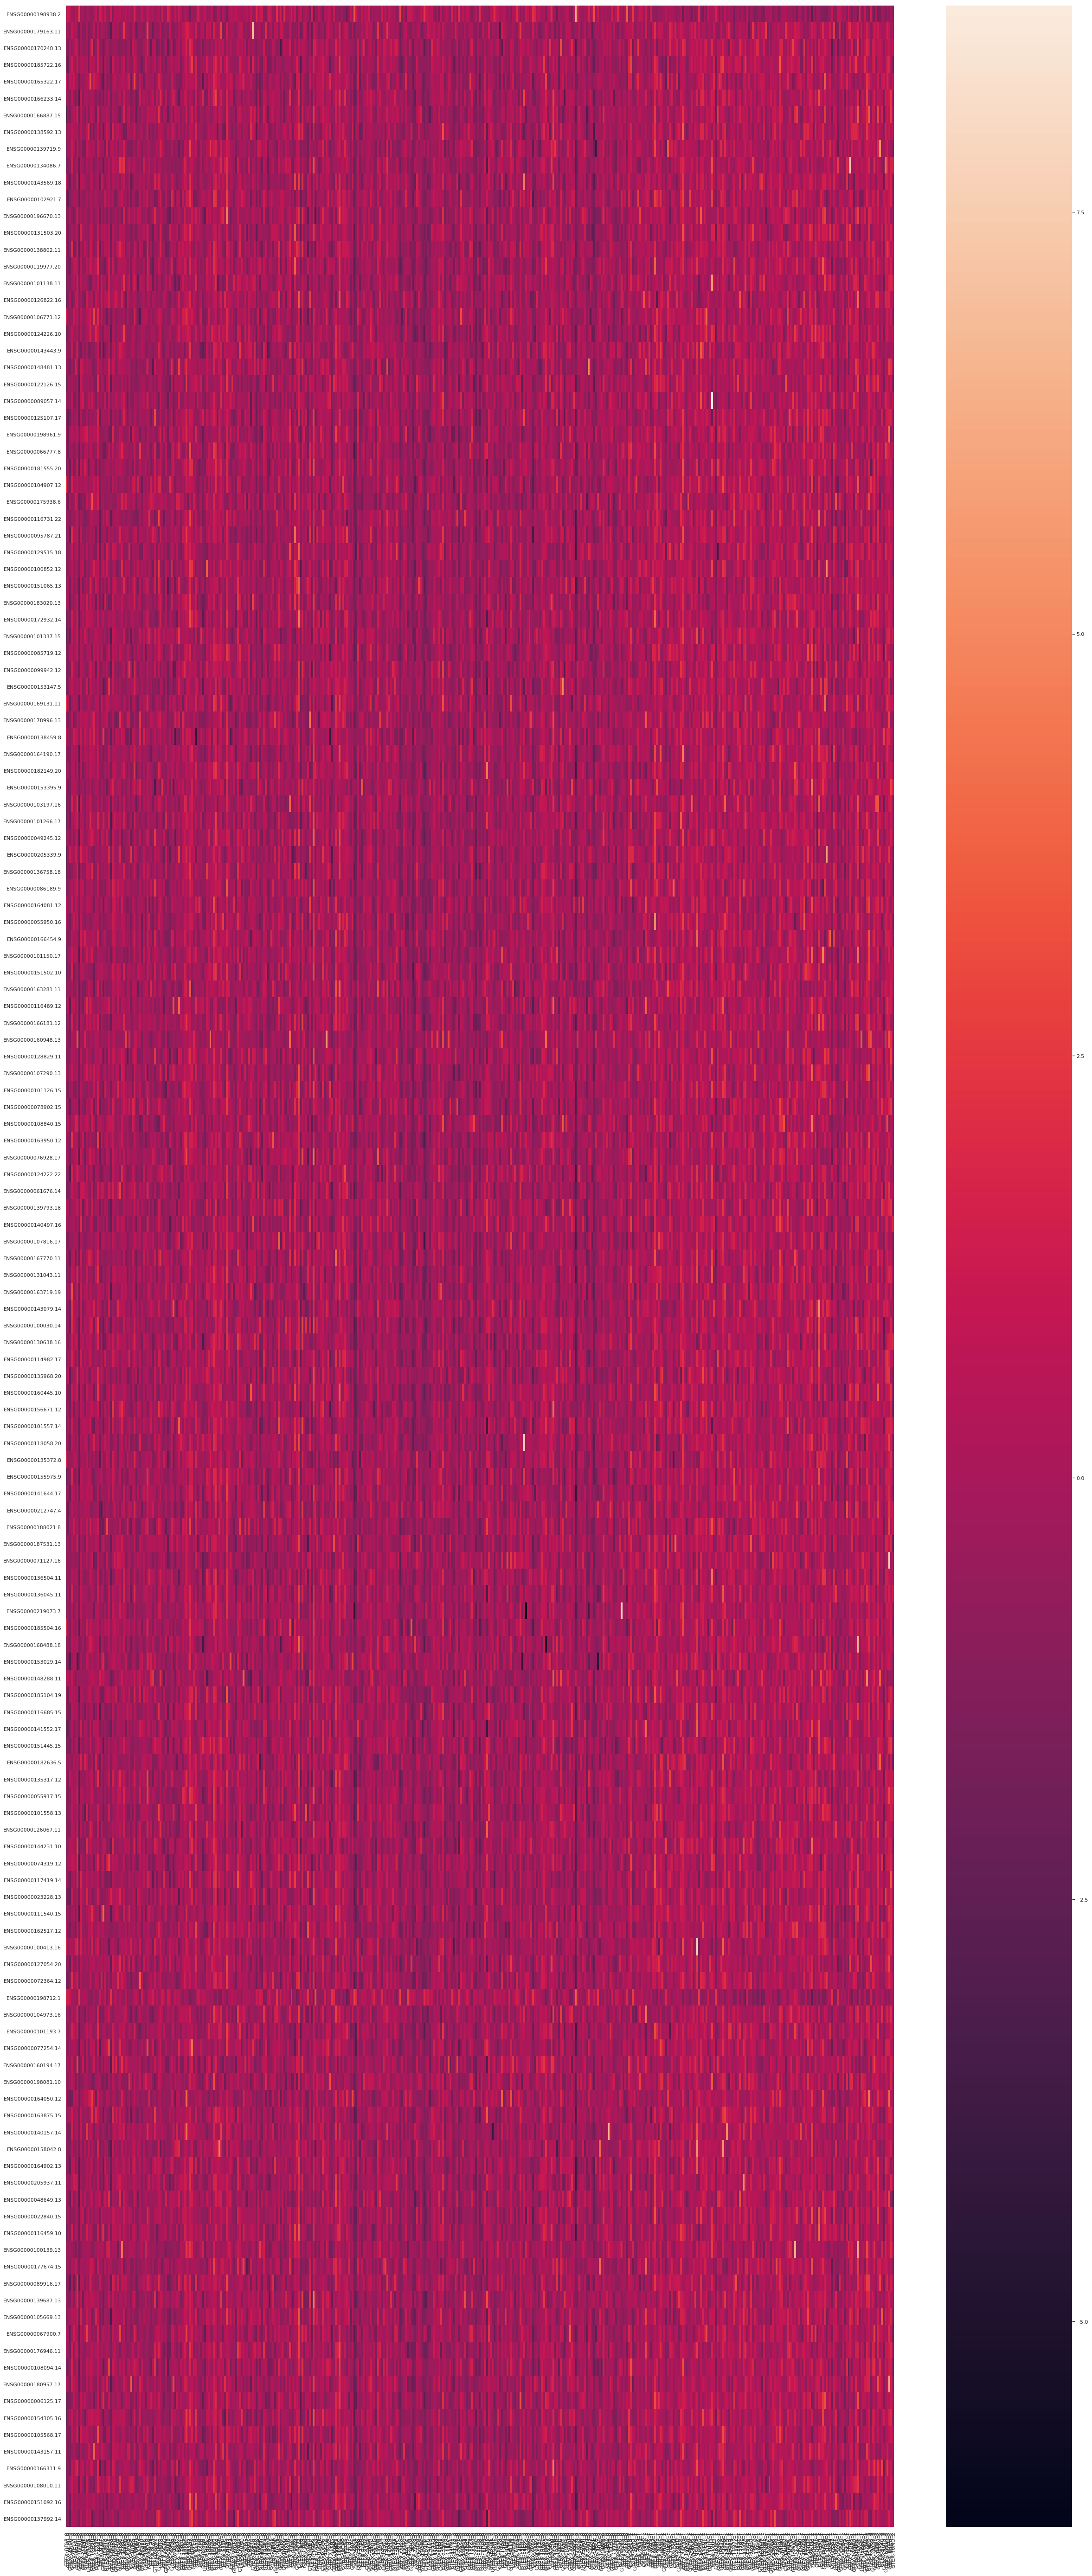

In [116]:
sns.set(rc={'figure.figsize':(40,100)})
# plt.subplots(figsize=(20,150))
# plt.subplots(figsize=(100,20))

sns.heatmap(expression_clustered_tophits[:150], xticklabels=True, yticklabels=True)
# .set_title('Power for Mixture Model with gamma')
# plt.xlabel('# Target Genes')
# plt.ylabel('Beta effect size')
plt.savefig('/storage/cynthiawu/trans_eQTL/Scripts/Plots/chr7_45109068_heatmap_genotypelabel.pdf') 

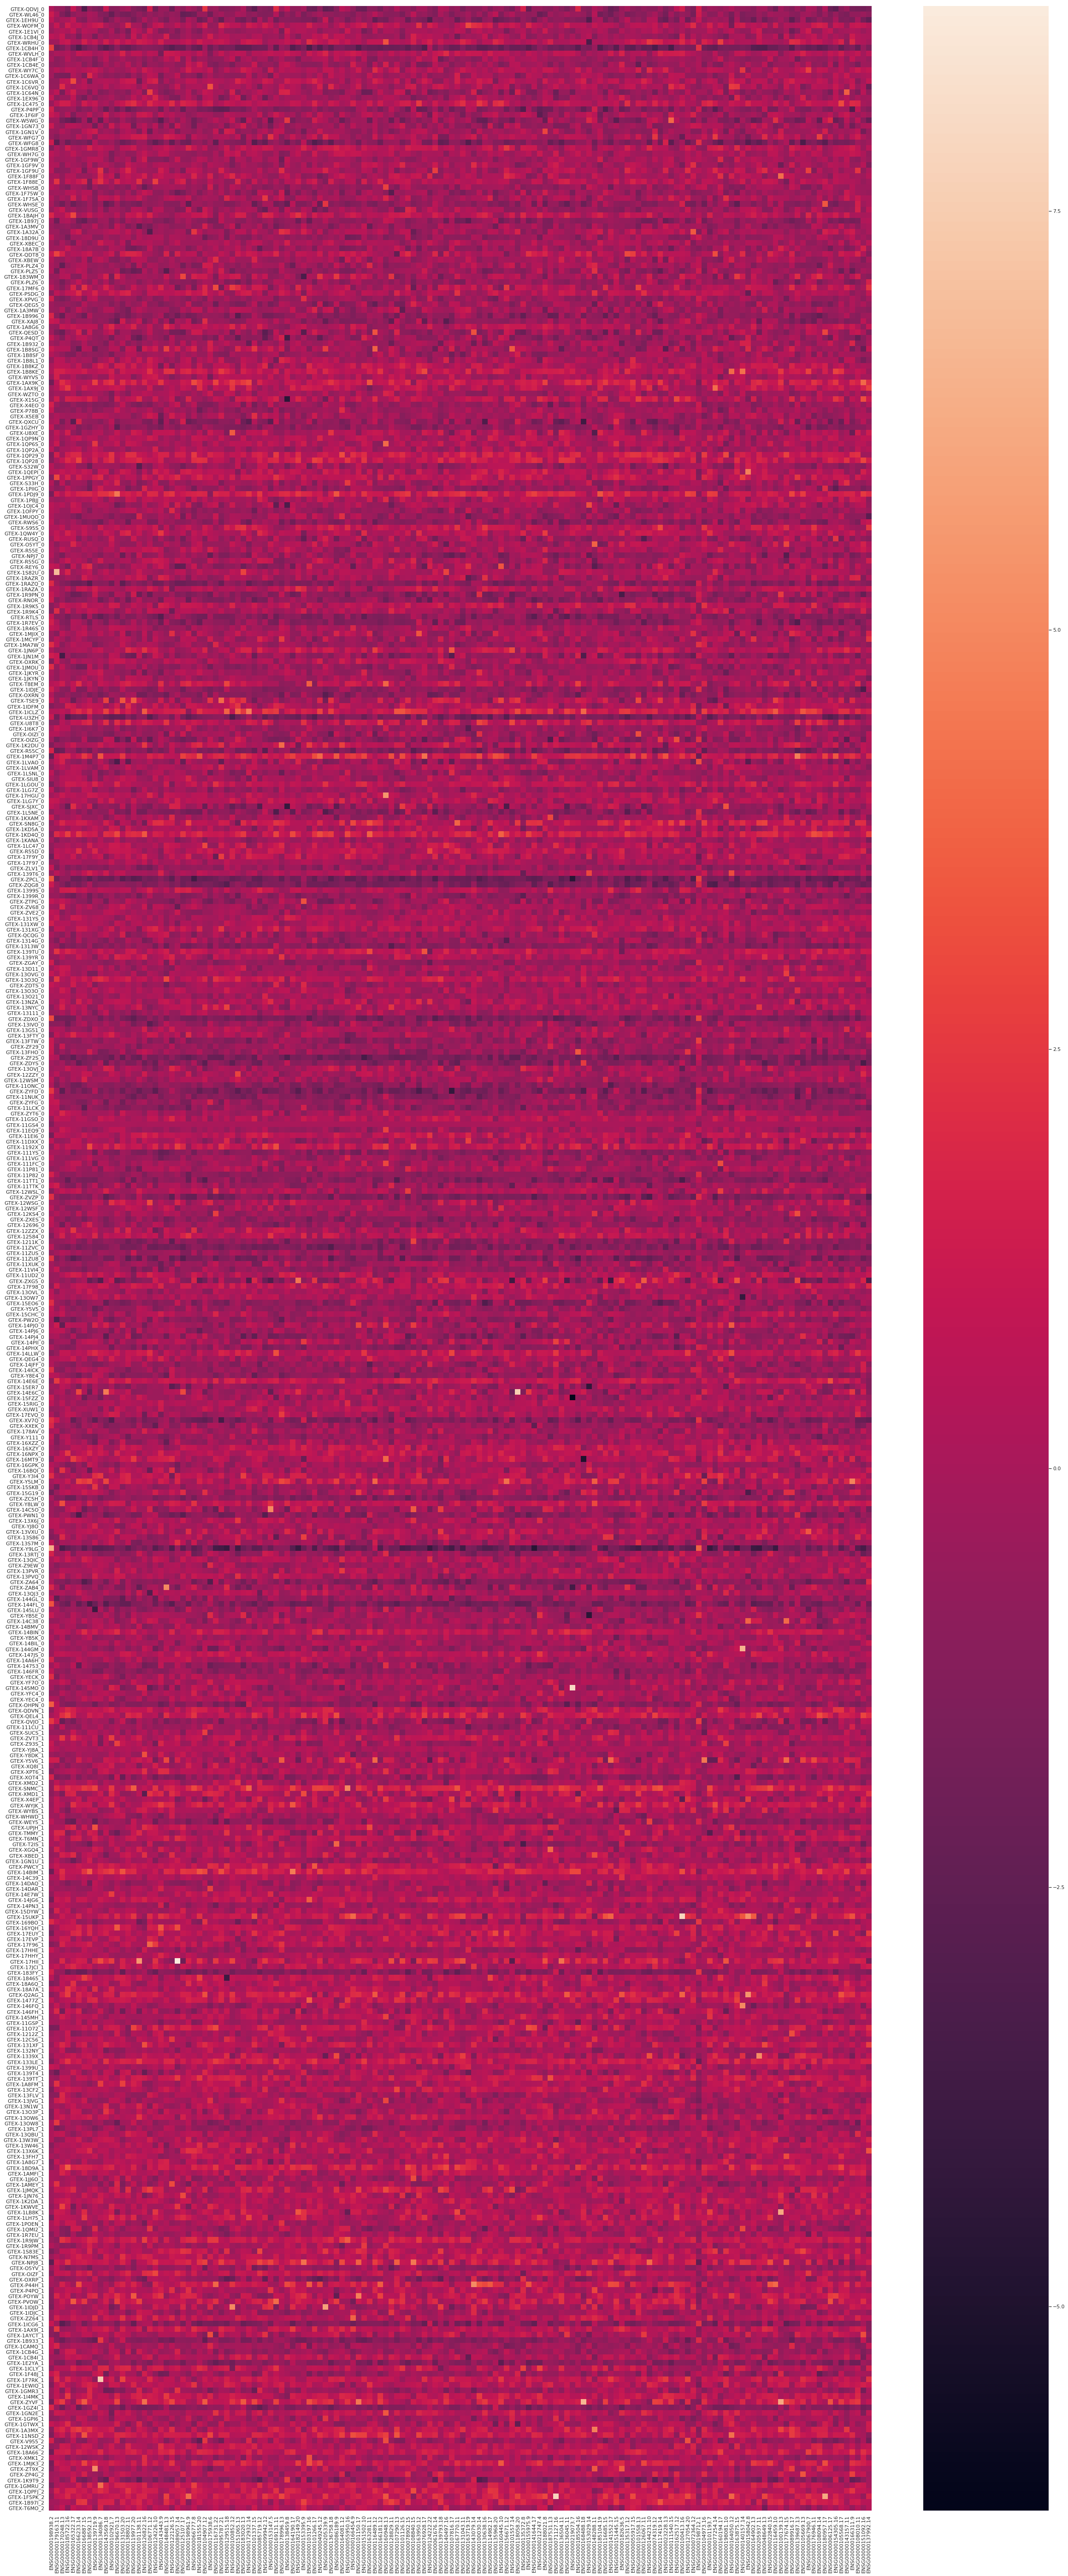

In [117]:
sns.set(rc={'figure.figsize':(40,100)})
# plt.subplots(figsize=(20,150))
# plt.subplots(figsize=(100,20))

sns.heatmap(expression_clustered_tophits[:150].T, xticklabels=True, yticklabels=True)
# .set_title('Power for Mixture Model with gamma')
# plt.xlabel('# Target Genes')
# plt.ylabel('Beta effect size')
plt.savefig('/storage/cynthiawu/trans_eQTL/Scripts/Plots/chr7_45109068_heatmap_genotypelabel.pdf') 

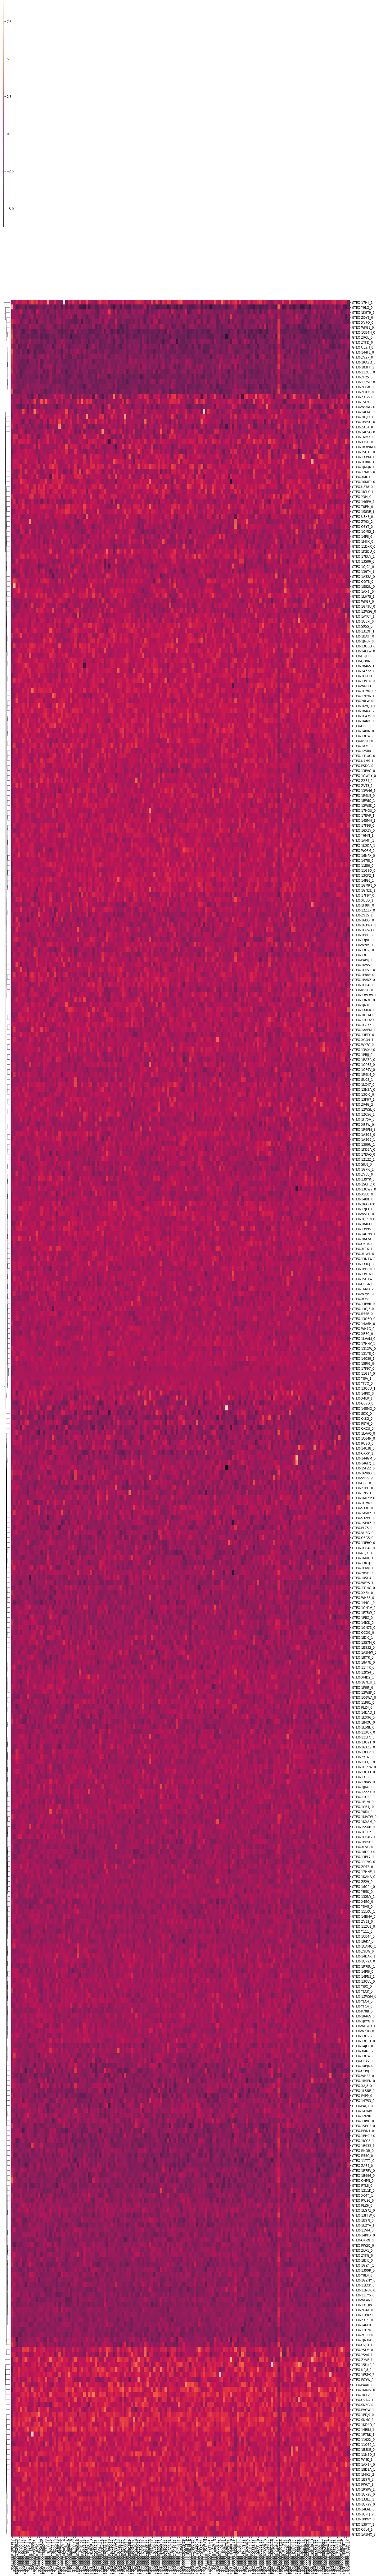

In [18]:
# sns.set(rc={'figure.figsize':(40,100)})
sns.clustermap(expression_clustered_tophits[:150].T, xticklabels=True, yticklabels=True, col_cluster=False, row_cluster=True, figsize=(20,150))
# .set_title('Power for Mixture Model with gamma')
# plt.xlabel('# Target Genes')
# plt.ylabel('Beta effect size')


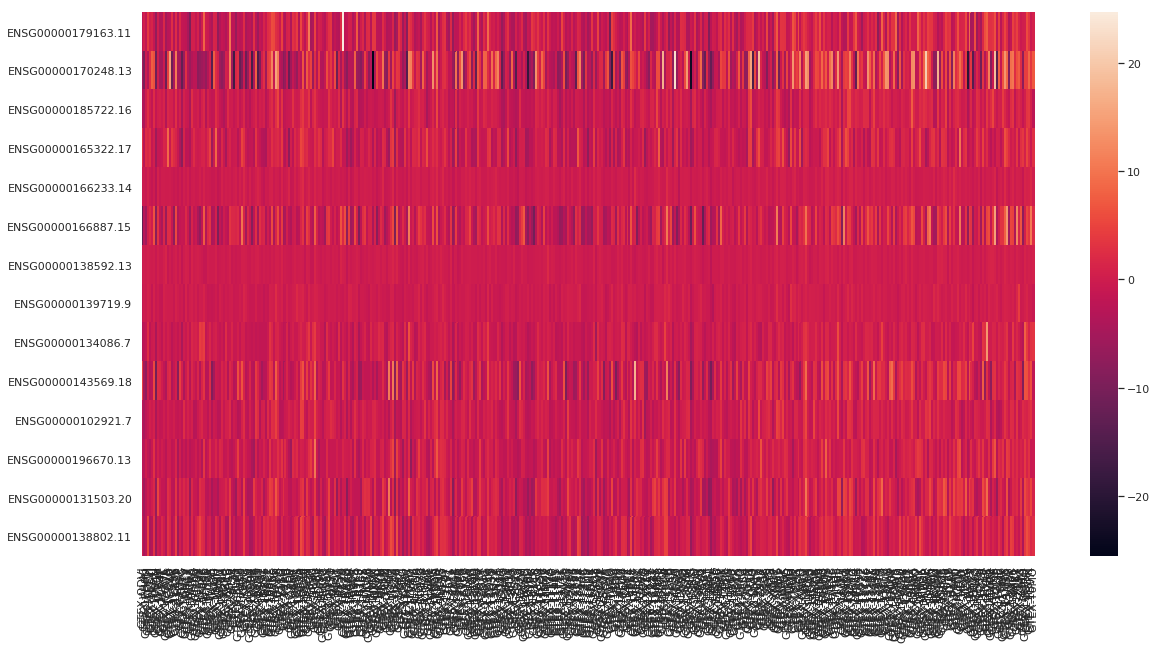

In [33]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(expression_clustered_tophits[1:15], xticklabels=True, yticklabels=True)
# .set_title('Power for Mixture Model with gamma')
# plt.xlabel('# Target Genes')
# plt.ylabel('Beta effect size')


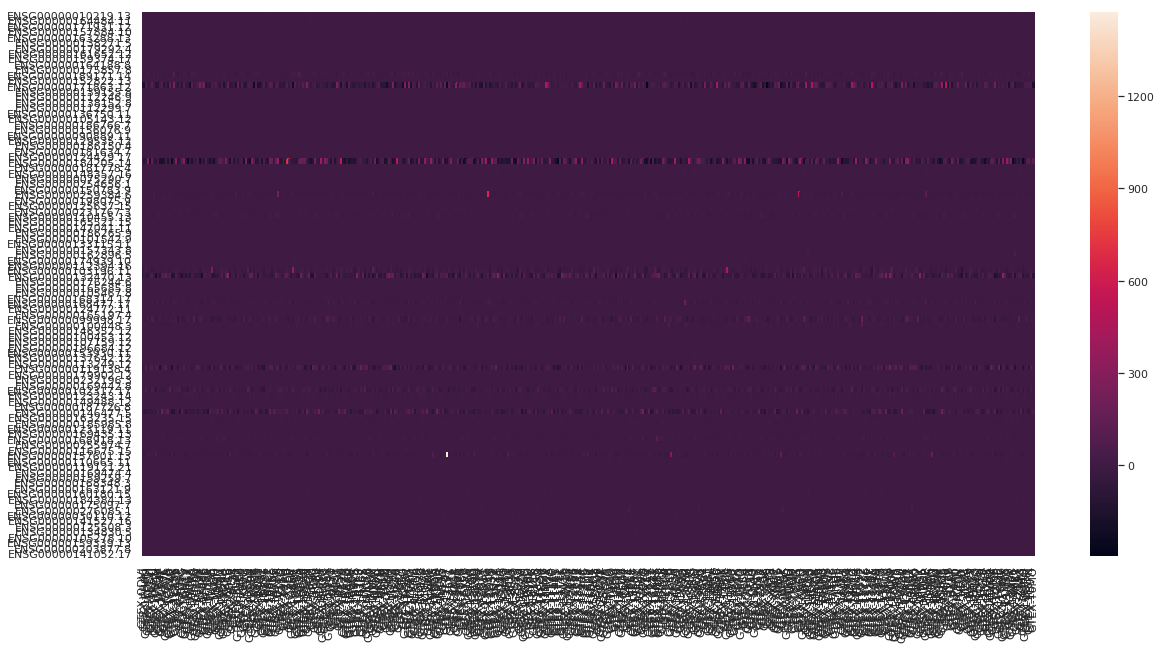

In [31]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(expression_clustered_nullhits[:100], xticklabels=True, yticklabels=True)
# .set_title('Power for Mixture Model with gamma')
# plt.xlabel('# Target Genes')
# plt.ylabel('Beta effect size')
